<a href="https://colab.research.google.com/github/shubhampareek1211/machinelearning/blob/main/titanic_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Data Cleaning**



In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv(r"/content/gender_submission.csv")
train_data_original = pd.read_csv(r"/content/train.csv")
train_data = train_data_original.copy()
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# removing the brackets in the name, not required
train_data["Name"]=train_data["Name"].str.replace(r"\s*\([^)]*\)", "", regex=True).str.strip()
#removing spaces if any present
train_data["Name"]= train_data["Name"].str.replace(r"\s{2,}"," ", regex=True).str.strip()
#dropping NA/NaN values from the age and filling with mean age of the column
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())
# as values are in float, changing it into the int type with astype(int) and those values which are zero assigning
train_data["Age"] = train_data["Age"].astype(int)
train_data["Age"] = train_data["Age"].replace(0,1)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [ ]:
# there are 4 NaN value that is 4 person had ticket NAMED "LINE" and converting the string to integer using pd.to_numeric function and later assigning them mean value to track and converting the float into integer  value
train_data["Ticket"] = pd.to_numeric(train_data["Ticket"],errors="coerce")
train_data["Ticket"] = train_data["Ticket"].fillna(train_data["Ticket"].mean())
train_data["Ticket"] = train_data['Ticket'].astype(int)
train_data
# ideally the class data should be dropped as there are lot of null values, but the class has very high corelation with the people who surivied

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,260318,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley",female,38,1,0,260318,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,260318,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,260318,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


# **2. Feature Engineering**


In [ ]:
# Feature Engineering
# Since the two columns that is SibSp and Parch are related and can be combined into family size for better intiution,
#we are merging these two columns into 1 named familysize and adding 1 for the alone passenger who are not travelling with anybody.

train_data["family_size"] = train_data["SibSp"] + train_data["Parch"] + 1

# dropping the SibSp and Parch column

train_data = train_data.drop(columns=["SibSp", "Parch"])
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22,260318,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley",female,38,260318,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26,260318,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath",female,35,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,260318,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26,111369,30.0000,C148,C,1


In [ ]:
# categorically dividing the values of family size into 3 ; solo, small, medium
# better for later encoding the values as these are in categories

def family_category(size):
    if size == 1:
        return "solo"
    elif size <=3:
        return "small"
    else:
        return "large"

train_data["family_category"] = train_data["family_size"].apply(family_category)

train_data


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_size,family_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22,260318,7.2500,NaN,S,2,small
1,2,1,1,"Cumings, Mrs. John Bradley",female,38,260318,71.2833,C85,C,2,small
2,3,1,3,"Heikkinen, Miss. Laina",female,26,260318,7.9250,NaN,S,1,solo
3,4,1,1,"Futrelle, Mrs. Jacques Heath",female,35,113803,53.1000,C123,S,2,small
4,5,0,3,"Allen, Mr. William Henry",male,35,373450,8.0500,NaN,S,1,solo
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,211536,13.0000,NaN,S,1,solo
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,112053,30.0000,B42,S,1,solo
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,260318,23.4500,NaN,S,4,large
889,890,1,1,"Behr, Mr. Karl Howell",male,26,111369,30.0000,C148,C,1,solo


In [ ]:
# Feature scaling the age and fare column using Min Max scaler as we are going to train on logistic regression, and the eculedian distance between two features can vary a big time as fare is in big integer. The MSE would be affected eventually
from sklearn.preprocessing import StandardScaler
import numpy as np

train_data["Fare"] = np.log1p(train_data["Fare"])  # handles skewness

scaler = StandardScaler()
train_data[["Age", "Fare"]] = scaler.fit_transform(train_data[["Age", "Fare"]])
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_size,family_category
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.581433,260318,-0.879741,NaN,S,2,small
1,2,1,1,"Cumings, Mrs. John Bradley",female,0.650386,260318,1.361220,C85,C,2,small
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.273478,260318,-0.798540,NaN,S,1,solo
3,4,1,1,"Futrelle, Mrs. Jacques Heath",female,0.419420,113803,1.062038,C123,S,2,small
4,5,0,3,"Allen, Mr. William Henry",male,0.419420,373450,-0.784179,NaN,S,1,solo
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,-0.196490,211536,-0.333698,NaN,S,1,solo
887,888,1,1,"Graham, Miss. Margaret Edith",female,-0.812400,112053,0.487082,B42,S,1,solo
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.042512,260318,0.242007,NaN,S,4,large
889,890,1,1,"Behr, Mr. Karl Howell",male,-0.273478,111369,0.487082,C148,C,1,solo


In [ ]:
# feature extracting on the names based on the title Mr., Mrs., Master, captain to capture age, social class and gender corelation and further putting them into category for encoding

train_data["Title"]=train_data["Name"].str.extract(r"([A-za-z]+)\.")
train_data["Title"] = train_data["Title"].replace(['Mlle','Ms'],'Miss')
train_data["Title"] = train_data["Title"].replace('Mme','Mrs')
train_data["Title"] = train_data["Title"].replace(['Countess','Lady','Sir','Jonkheer','Don','Dona','Capt','Col','Major','Rev','Dr'],'Rare')


In [ ]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_size,family_category,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.581433,260318,-0.879741,NaN,S,2,small,Mr
1,2,1,1,"Cumings, Mrs. John Bradley",female,0.650386,260318,1.361220,C85,C,2,small,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.273478,260318,-0.798540,NaN,S,1,solo,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath",female,0.419420,113803,1.062038,C123,S,2,small,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,0.419420,373450,-0.784179,NaN,S,1,solo,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,-0.196490,211536,-0.333698,NaN,S,1,solo,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",female,-0.812400,112053,0.487082,B42,S,1,solo,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.042512,260318,0.242007,NaN,S,4,large,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,-0.273478,111369,0.487082,C148,C,1,solo,Mr


In [ ]:
# extracting the deck information as higher deck class can correspond to better surviability rate and thsoe with NaN will be given U for unknown
# extracted the first key word as deck only had class like A,b,c
train_data["Deck"] = train_data["Cabin"].str[0]
# in place of unkown providing the missing value
train_data["Deck"] = train_data["Deck"].fillna("Unkown").str[0]
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_size,family_category,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.581433,260318,-0.879741,NaN,S,2,small,Mr,U
1,2,1,1,"Cumings, Mrs. John Bradley",female,0.650386,260318,1.361220,C85,C,2,small,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.273478,260318,-0.798540,NaN,S,1,solo,Miss,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath",female,0.419420,113803,1.062038,C123,S,2,small,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,0.419420,373450,-0.784179,NaN,S,1,solo,Mr,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,-0.196490,211536,-0.333698,NaN,S,1,solo,Rare,U
887,888,1,1,"Graham, Miss. Margaret Edith",female,-0.812400,112053,0.487082,B42,S,1,solo,Miss,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.042512,260318,0.242007,NaN,S,4,large,Miss,U
889,890,1,1,"Behr, Mr. Karl Howell",male,-0.273478,111369,0.487082,C148,C,1,solo,Mr,C


In [ ]:
# to capture the relation if person is alone whether he survived or only family survived
train_data["IsAlone"] = (train_data["family_size"] == 1).astype(int)


# dropping the unused column now such as name, ticket and passenger id
train_data = train_data.drop(columns=["Ticket", "Name","Cabin","family_size"])



In [ ]:
train_data = train_data.drop(columns=['PassengerId'])
train_data

,Survived,Pclass,Sex,Age,Fare,Embarked,family_category,Title,Deck,IsAlone
0,0,3,male,-0.581433,-0.879741,S,small,Mr,U,0
1,1,1,female,0.650386,1.361220,C,small,Mrs,C,0
2,1,3,female,-0.273478,-0.798540,S,solo,Miss,U,1
3,1,1,female,0.419420,1.062038,S,small,Mrs,C,0
4,0,3,male,0.419420,-0.784179,S,solo,Mr,U,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,-0.196490,-0.333698,S,solo,Rare,U,1
887,1,1,female,-0.812400,0.487082,S,solo,Miss,B,1
888,0,3,female,-0.042512,0.242007,S,large,Miss,U,0
889,1,1,male,-0.273478,0.487082,C,solo,Mr,C,1


In [ ]:
# extracting the relationship between deck and Pclass
train_data["Sex_Pclass_cat"] = train_data["Sex"].astype(str) + "_" + train_data["Pclass"].astype(str)
train_data



,Survived,Pclass,Sex,Age,Fare,Embarked,family_category,Title,Deck,IsAlone,Sex_Pclass_cat
0,0,3,male,-0.581433,-0.879741,S,small,Mr,U,0,male_3
1,1,1,female,0.650386,1.361220,C,small,Mrs,C,0,female_1
2,1,3,female,-0.273478,-0.798540,S,solo,Miss,U,1,female_3
3,1,1,female,0.419420,1.062038,S,small,Mrs,C,0,female_1
4,0,3,male,0.419420,-0.784179,S,solo,Mr,U,1,male_3
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,-0.196490,-0.333698,S,solo,Rare,U,1,male_2
887,1,1,female,-0.812400,0.487082,S,solo,Miss,B,1,female_1
888,0,3,female,-0.042512,0.242007,S,large,Miss,U,0,female_3
889,1,1,male,-0.273478,0.487082,C,solo,Mr,C,1,male_1


In [ ]:
# seprating the target and feature variable, putting survived column in the y and rest are in X and further split the data as 80-20% and random_seed to maintain the order

from sklearn.model_selection import train_test_split

X = train_data.drop(['Survived'],axis=1)
y = train_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)


In [ ]:
X_train

,Pclass,Sex,Age,Fare,Embarked,family_category,Title,Deck,IsAlone,Sex_Pclass_cat
692,3,male,-0.042512,1.124896,S,solo,Mr,U,1,male_3
481,2,male,-0.042512,-3.058578,S,solo,Mr,U,1,male_2
527,1,male,-0.042512,2.523412,S,solo,Mr,C,1,male_1
855,3,female,-0.889388,-0.645593,S,small,Mrs,U,0,female_3
801,2,female,0.111465,0.353956,S,small,Mrs,U,0,female_2
...,...,...,...,...,...,...,...,...,...,...
359,3,female,-0.042512,-0.803852,Q,solo,Miss,U,1,female_3
258,1,female,0.419420,3.385294,C,solo,Miss,U,1,female_1
736,3,female,1.420273,0.623394,S,large,Mrs,U,0,female_3
462,1,male,1.343285,0.737276,S,solo,Mr,E,1,male_1


One Hot encoding the required values and spliting it into numerical and categorical

In [ ]:
# putting the categorical value into category
numerical_features = ["Age","Fare","Pclass","IsAlone"]
categorical_features = ["Sex","Embarked","Title","Sex_Pclass_cat","Deck","family_category"]


In [ ]:
#building the pipeline to classify the categorical features into one hot encoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

ordinal_transformer = OrdinalEncoder(categories=[["solo","small","large"]])
onehot_transformer= OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_features),  # Already scaled
        ("onehot", onehot_transformer, categorical_features),
    ])

# **3. Model Training**

# Naive Bayes classifier

(BernoulliNB or GaussianNB depending on your
dataset), and  apply Laplace smoothing (add-α).


In [ ]:
#Naive bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

#building the naive bayes classifier and adding laplase smoothing which don't have effect

alphas = [1e-9,1e-2]   # analogous to α = 1.0 vs 0.01
for a in alphas:
    nb_model = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", GaussianNB(var_smoothing=a))
    ])
    nb_model.fit(X_train, y_train)
    y_pred = nb_model.predict(X_test)

    print(f"\n=== GaussianNB (var_smoothing={a}) ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=3))



=== GaussianNB (var_smoothing=1e-09) ===
Accuracy: 0.7150837988826816
              precision    recall  f1-score   support

           0      0.811     0.700     0.751       110
           1      0.607     0.739     0.667        69

    accuracy                          0.715       179
   macro avg      0.709     0.720     0.709       179
weighted avg      0.732     0.715     0.719       179


=== GaussianNB (var_smoothing=0.01) ===
Accuracy: 0.7262569832402235
              precision    recall  f1-score   support

           0      0.814     0.718     0.763       110
           1      0.622     0.739     0.675        69

    accuracy                          0.726       179
   macro avg      0.718     0.729     0.719       179
weighted avg      0.740     0.726     0.729       179



In [ ]:
#Building BernoulliNB with different alpha for smoothing
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

#alphas = [1.0]
nb_model_b = Pipeline(steps=[
    ("preprocessor", preprocessor),     # your ColumnTransformer
    ("classifier", BernoulliNB(alpha=1.0))
])
nb_model_b.fit(X_train, y_train)
y_pred = nb_model_b.predict(X_test)

print(f"\n=== BernoulliNB (alpha={1.0}) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

# for alpha = 0.1

nb_modelb1 = Pipeline(steps=[
    ("preprocessor", preprocessor),     # your ColumnTransformer
    ("classifier", BernoulliNB(alpha=0.1))
])

nb_modelb1.fit(X_train, y_train)
y_pred = nb_modelb1.predict(X_test)

print(f"\n=== BernoulliNB (alpha={0.1}) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))


=== BernoulliNB (alpha=1.0) ===
Accuracy: 0.7597765363128491
              precision    recall  f1-score   support

           0      0.825     0.773     0.798       110
           1      0.671     0.739     0.703        69

    accuracy                          0.760       179
   macro avg      0.748     0.756     0.751       179
weighted avg      0.766     0.760     0.762       179


=== BernoulliNB (alpha=0.1) ===
Accuracy: 0.7597765363128491
              precision    recall  f1-score   support

           0      0.825     0.773     0.798       110
           1      0.671     0.739     0.703        69

    accuracy                          0.760       179
   macro avg      0.748     0.756     0.751       179
weighted avg      0.766     0.760     0.762       179



# 3. linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
# Linear Regression (no regularization)
linreg_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

linreg_model.fit(X_train, y_train)

# Get continuous predictions
y_pred_prob = linreg_model.predict(X_test)

# Apply 0.5 threshold
y_pred = (y_pred_prob >= 0.5).astype(int)

print("=== Linear Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))


=== Linear Regression ===
Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0      0.832     0.900     0.865       110
           1      0.817     0.710     0.760        69

    accuracy                          0.827       179
   macro avg      0.824     0.805     0.812       179
weighted avg      0.826     0.827     0.824       179



**Ridge Regressino and putting a threshold vale along with the alpha as 0.1 and 1.0**

In [ ]:
# ridge regression
ridge_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", Ridge(alpha=1.0))
])

ridge_model.fit(X_train, y_train)
y_pred_prob = ridge_model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

print("=== Ridge Regression (L2, alpha=1.0) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))


=== Ridge Regression (L2, alpha=1.0) ===
Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0      0.825     0.900     0.861       110
           1      0.814     0.696     0.750        69

    accuracy                          0.821       179
   macro avg      0.819     0.798     0.805       179
weighted avg      0.821     0.821     0.818       179



In [ ]:
#trying the different values of the alpha

ridge_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", Ridge(alpha=0.1))
])

ridge_model.fit(X_train, y_train)
y_pred_prob = ridge_model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

print("=== Ridge Regression (L2, alpha=0.1) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

=== Ridge Regression (L2, alpha=0.1) ===
Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0      0.832     0.900     0.865       110
           1      0.817     0.710     0.760        69

    accuracy                          0.827       179
   macro avg      0.824     0.805     0.812       179
weighted avg      0.826     0.827     0.824       179



**LASSO Regression with alpha 0.001**

In [ ]:
#LASSO regression

lasso_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", Lasso(alpha=0.001))
])

lasso_model.fit(X_train, y_train)
y_pred_prob = lasso_model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

print("=== LASSO Regression (L1, alpha=0.001) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))


=== LASSO Regression (L1, alpha=0.001) ===
Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0      0.825     0.900     0.861       110
           1      0.814     0.696     0.750        69

    accuracy                          0.821       179
   macro avg      0.819     0.798     0.805       179
weighted avg      0.821     0.821     0.818       179



**checking the encoded value to verify the data **

In [ ]:
# Get the preprocessor object from the pipeline
preprocessor = nb_model_b.named_steps["preprocessor"]

# Transform X_train
X_train_encoded = preprocessor.transform(X_train)

print("Encoded shape:", X_train_encoded.shape)
print(X_train_encoded)

import pandas as pd

encoded_cols = (
    preprocessor.named_transformers_["onehot"]
    .get_feature_names_out(categorical_features)
)

# Combine numeric + one-hot feature names
all_features = numerical_features + encoded_cols.tolist()

# Convert to DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=all_features)
X_train_encoded_df.head()


Encoded shape: (712, 33)
[[-0.04251229  1.12489551  3.         ...  0.          0.
   1.        ]
 [-0.04251229 -3.05857773  2.         ...  0.          0.
   1.        ]
 [-0.04251229  2.52341198  1.         ...  0.          0.
   1.        ]
 ...
 [ 1.42027343  0.62339383  3.         ...  1.          0.
   0.        ]
 [ 1.34328471  0.73727594  1.         ...  0.          0.
   1.        ]
 [-0.04251229  0.36526094  1.         ...  0.          0.
   1.        ]]


,Age,Fare,Pclass,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,family_category_large,family_category_small,family_category_solo
0,-0.042512,1.124896,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.042512,-3.058578,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.042512,2.523412,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.889388,-0.645593,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.111465,0.353956,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
encoder = nb_model_b.named_steps["preprocessor"].named_transformers_["onehot"]
encoded_names = encoder.get_feature_names_out(categorical_features)
print(encoded_names)


['Sex_female' 'Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S'
 'Embarked_nan' 'Title_Master' 'Title_Miss' 'Title_Mr' 'Title_Mrs'
 'Title_Rare' 'Sex_Pclass_cat_female_1' 'Sex_Pclass_cat_female_2'
 'Sex_Pclass_cat_female_3' 'Sex_Pclass_cat_male_1' 'Sex_Pclass_cat_male_2'
 'Sex_Pclass_cat_male_3' 'Deck_A' 'Deck_B' 'Deck_C' 'Deck_D' 'Deck_E'
 'Deck_F' 'Deck_G' 'Deck_T' 'Deck_U' 'family_category_large'
 'family_category_small' 'family_category_solo']


# **4. Model Evaluation **

=== Model Evaluation ===
Accuracy:  0.760
Precision: 0.671
Recall:    0.739
F1-score:  0.703

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       110
           1       0.67      0.74      0.70        69

    accuracy                           0.76       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.77      0.76      0.76       179



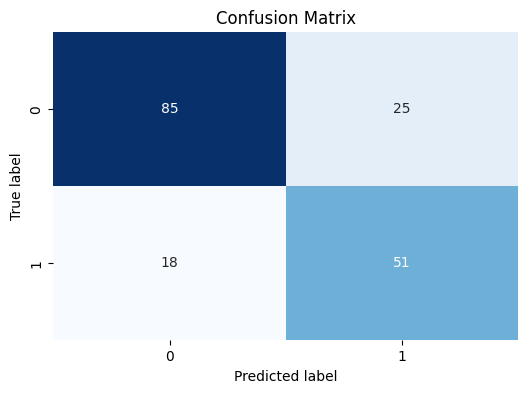

In [ ]:

#Model Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = nb_model_b.predict(X_test)

# For ROC/AUC, we need probabilities
y_prob = nb_model_b.predict_proba(X_test)[:, 1]

# Compute basic metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== Model Evaluation ===")
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1-score:  {f1:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# confusion matrix with heatmap

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()




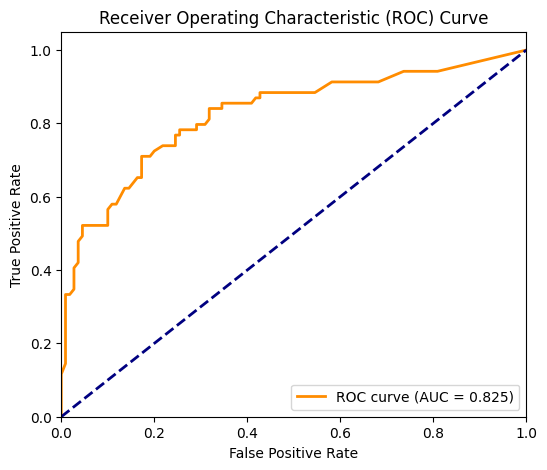

In [ ]:
# ROC AUC curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

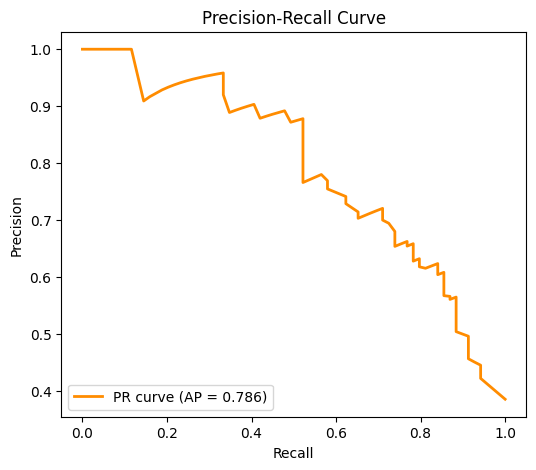

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall curve and area under the curve (AUC)
precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_prec = average_precision_score(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color="darkorange", lw=2, label=f"PR curve (AP = {avg_prec:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()